##importing liberaries

In [ ]:
import time
import sys
import math
import random
import heapq
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from math import exp
from itertools import count

##Generating the maze

In [ ]:
def generate_optimized_maze(size, wall_probability=0.3):
    maze = np.zeros(size, dtype=int)
    start = (0, 0)
    goal = (size[0] - 1, size[1] - 1)

    current = start
    while current != goal:
        x, y = current
        neighbors = []
        if x + 1 < size[0]: neighbors.append((x + 1, y))
        if y + 1 < size[1]: neighbors.append((x, y + 1))
        next_cell = neighbors[np.random.choice(len(neighbors))]
        maze[next_cell] = 0
        current = next_cell

    for i in range(size[0]):
        for j in range(size[1]):
            if maze[i, j] == 0 and np.random.rand() < wall_probability:
                maze[i, j] = 1

    return maze

In [ ]:
def plot_maze(maze, start=(0, 0), goal=None, path=None):

    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap="gray_r", origin="upper")
    plt.title("The Maze")
    plt.xticks([]), plt.yticks([])

    plt.scatter(start[1], start[0], c="green", label="Start", s=100, edgecolors="black")
    if goal:
        plt.scatter(goal[1], goal[0], c="red", label="Goal", s=100, edgecolors="black")

    if path:
        for x, y in path:
            plt.scatter(y, x, c="blue", s=10)

    plt.legend()
    plt.show()

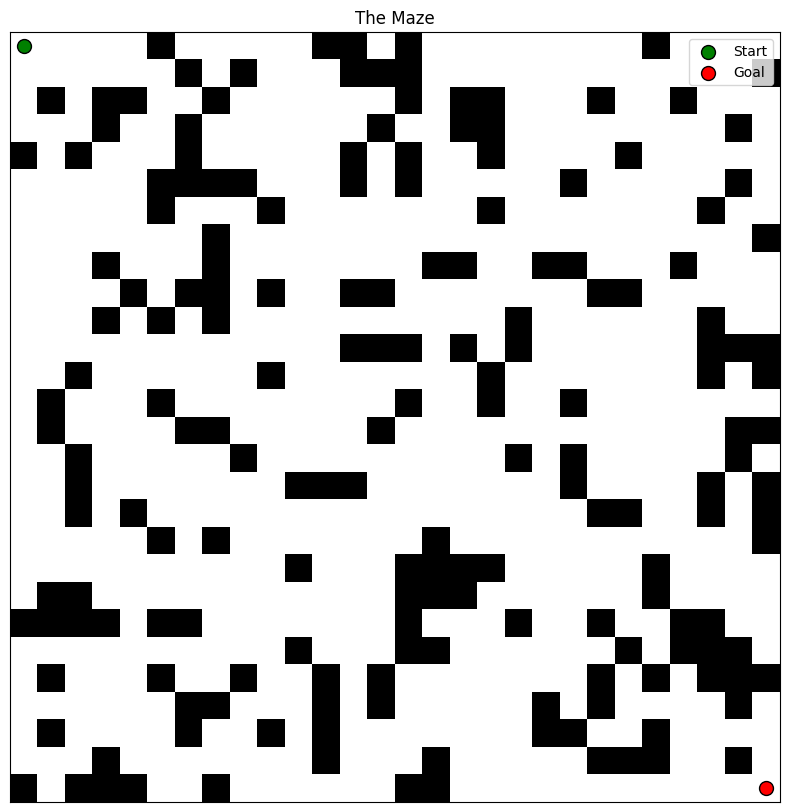

In [ ]:
maze_size = (28,28)
start_point = (0, 0)
goal_point = (maze_size[0] - 1, maze_size[1] - 1)

maze = generate_optimized_maze(maze_size, wall_probability=0.2)
plot_maze(maze, start=start_point, goal=goal_point)

## BFS

BFS Path found of Length: 55


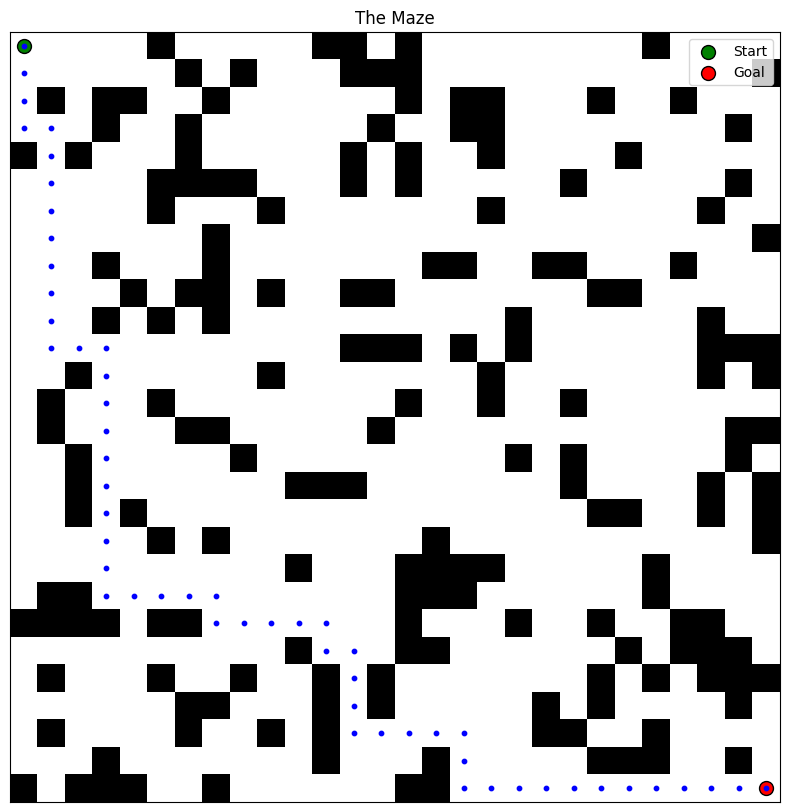

In [ ]:
def bfs(maze, start, goal):
    rows, cols = maze.shape
    visited = np.zeros((rows, cols), dtype=bool)
    queue = deque([(start, [start])])

    while queue:
        current, path = queue.popleft()

        if current == goal:
            return path

        x, y = current

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny] and maze[nx, ny] == 0:
                visited[nx, ny] = True
                queue.append(((nx, ny), path + [(nx, ny)]))

    return None

bfs_path = bfs(maze, start_point, goal_point)


if bfs_path:
    print(f"BFS Path found of Length: {len(bfs_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=bfs_path)
else:
    print("BFS could not find a path!")

## DFS

DFS Path found of Length: 135


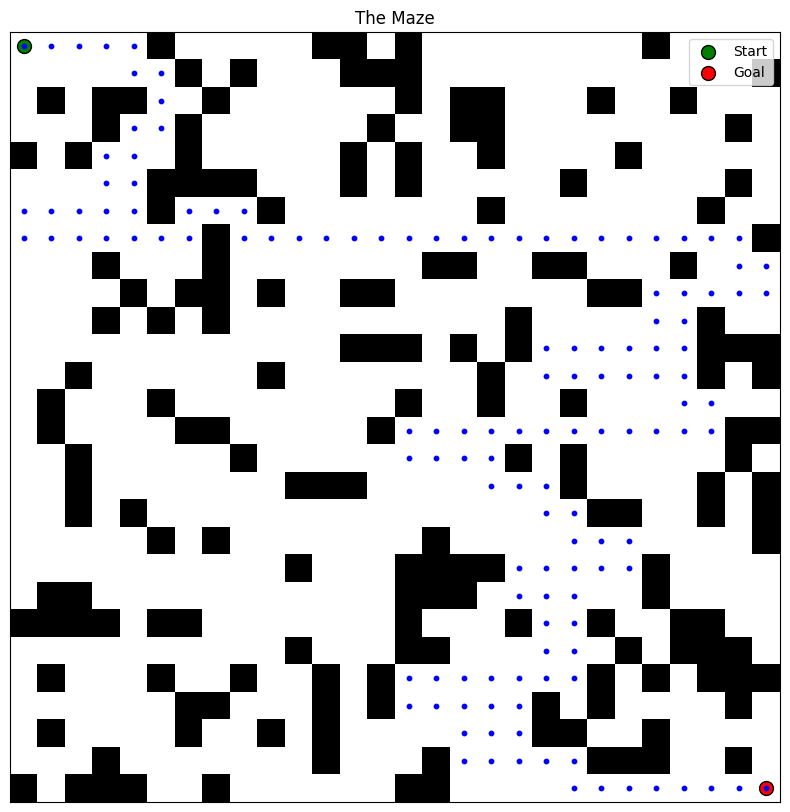

In [ ]:
def dfs(maze, start, goal):

    rows, cols = maze.shape
    visited = set()
    stack = [(start, [start])]

    while stack:
        current, path = stack.pop()

        if current == goal:
            return path

        if current not in visited:
            visited.add(current)
            x, y = current

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and (nx, ny) not in visited:
                    stack.append(((nx, ny), path + [(nx, ny)]))
    return None

dfs_path = dfs(maze, start_point, goal_point)

if dfs_path:
    print(f"DFS Path found of Length: {len(dfs_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=dfs_path)
else:
    print("DFS could not find a path!")

##UCS

UCS Path found of Length: 55


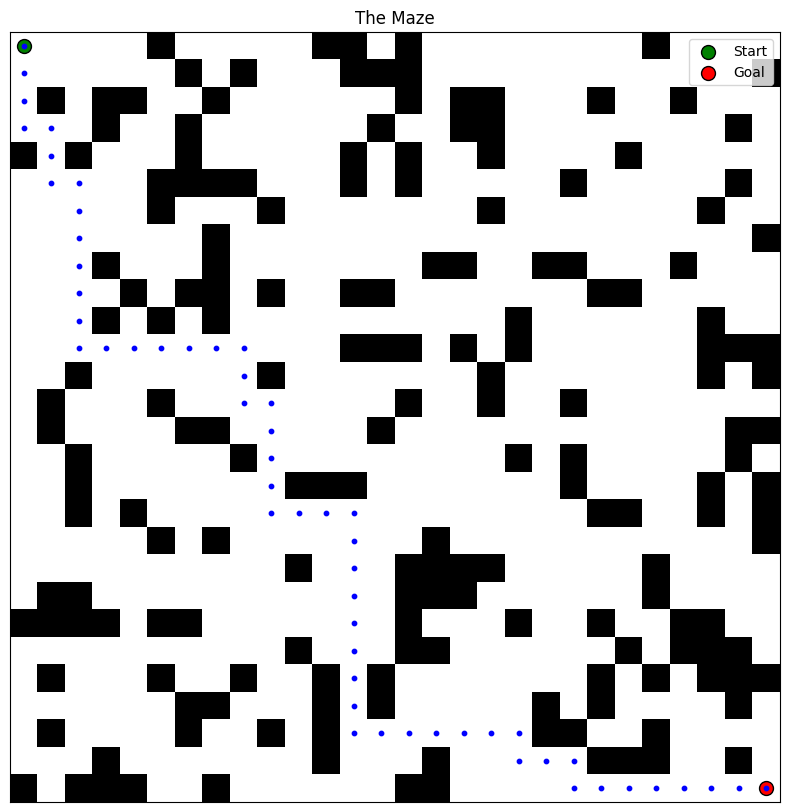

In [ ]:
def ucs(maze, start, goal):

    rows, cols = maze.shape
    visited = set()
    priority_queue = [(1, start, [start])] # 1 is the cost for all steps.

    while priority_queue:
        cost, current, path = heapq.heappop(priority_queue)

        if current == goal:
            return path

        if current not in visited:
            visited.add(current)
            x, y = current

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and (nx, ny) not in visited:
                    heapq.heappush(priority_queue, (cost + 1, (nx, ny), path + [(nx, ny)]))

    return None

ucs_path = ucs(maze, start_point, goal_point)

if ucs_path:
    print(f"UCS Path found of Length: {len(ucs_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=ucs_path)
else:
    print("UCS could not find a path!")

##IDS

IDS Path found of Length: 97


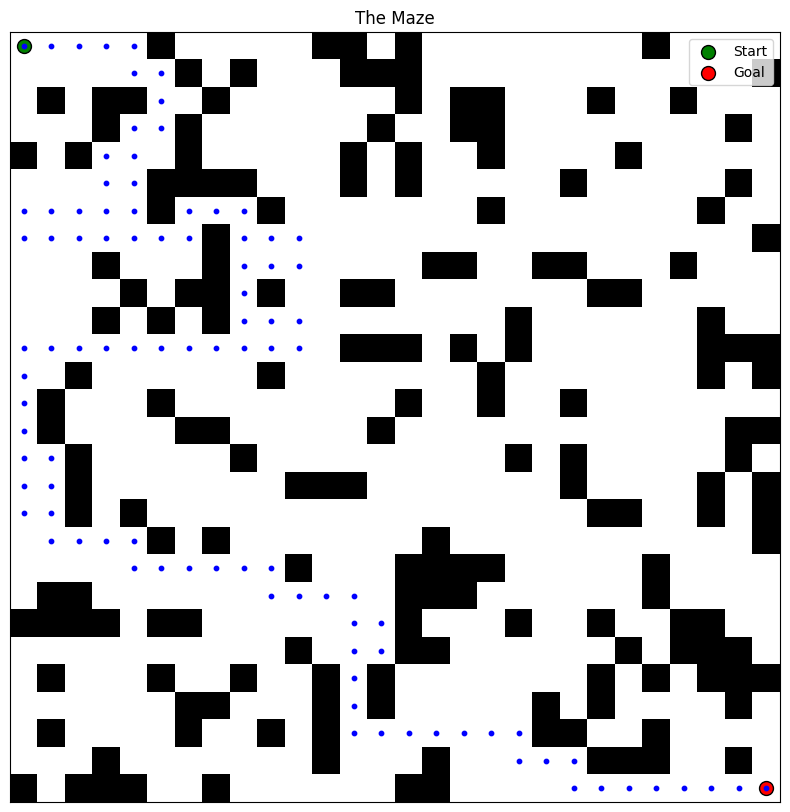

In [ ]:
def ids(maze, start, goal, max_depth=100):

    for depth in range(max_depth):
        visited = set()
        stack = [(start, [start], 0)] # 0 is the current depth at the start point

        while stack:
            current, path, current_depth = stack.pop()

            if current == goal:
                return path

            if current_depth < depth and current not in visited:
                visited.add(current)
                x, y = current
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and \
                       maze[nx, ny] == 0 and (nx, ny) not in visited:
                        stack.append(((nx, ny), path + [(nx, ny)], current_depth + 1))
    return None

ids_path = ids(maze, start_point, goal_point)

if ids_path:
    print(f"IDS Path found of Length: {len(ids_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=ids_path)
else:
    print("IDS could not find a path!")

##GREEDY

GBFS (Manhattan) Path found of Length: 79


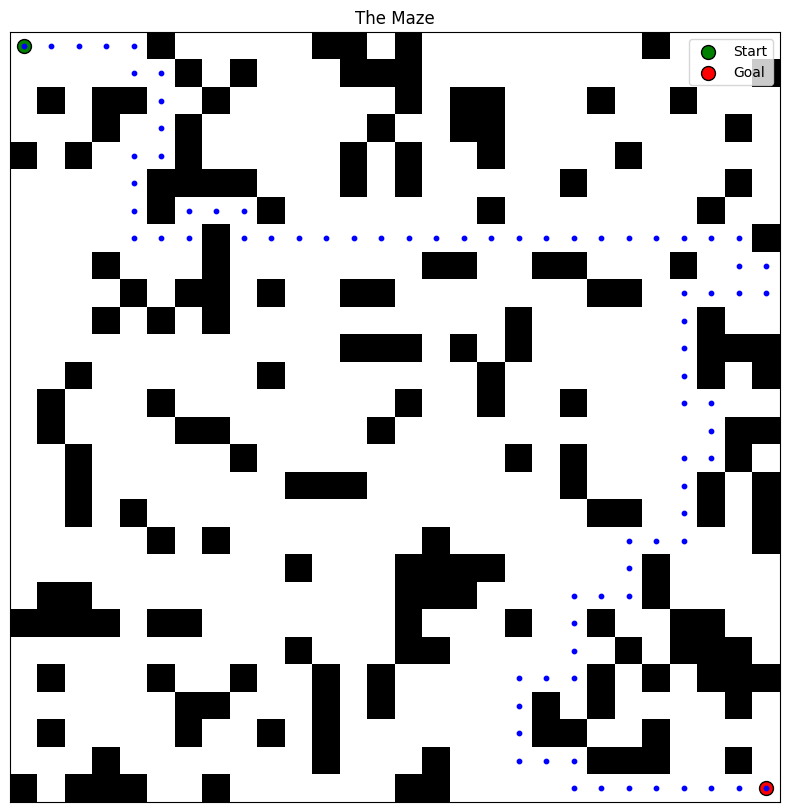

In [ ]:
def greedy_best_first_search_manhattan(maze, start, goal):

    rows, cols = maze.shape
    priority_queue = [(0, start, [start])]
    visited = set()

    while priority_queue:
        heuristic_cost, current, path = heapq.heappop(priority_queue)

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)
        x, y = current

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            neighbor = (nx, ny)

            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and neighbor not in visited:
                heuristic = abs(nx - goal[0]) + abs(ny - goal[1])
                heapq.heappush(priority_queue, (heuristic, neighbor, path + [neighbor]))

    return None

gbfs_path_manhattan = greedy_best_first_search_manhattan(maze, start_point, goal_point)
if gbfs_path_manhattan:
    print(f"GBFS (Manhattan) Path found of Length: {len(gbfs_path_manhattan)}")
    plot_maze(maze, start_point, goal_point, gbfs_path_manhattan)
else:
    print("GBFS (Manhattan) could not find a path!")

GBFS (Euclidean) Path found of Length: 63


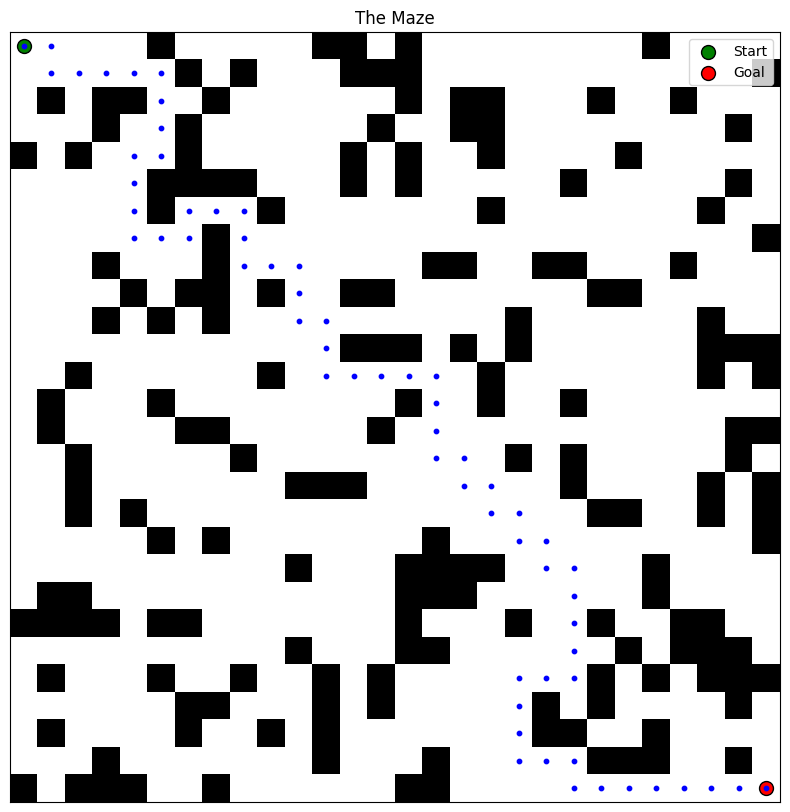

In [ ]:
def greedy_best_first_search_euclidean(maze, start, goal):

    rows, cols = maze.shape
    priority_queue = [(0, start, [start])]
    visited = set()

    while priority_queue:
        heuristic_cost, current, path = heapq.heappop(priority_queue)

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)
        x, y = current

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            neighbor = (nx, ny)

            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and neighbor not in visited:
                heuristic = ((nx - goal[0])**2 + (ny - goal[1])**2)**0.5
                heapq.heappush(priority_queue, (heuristic, neighbor, path + [neighbor]))

    return None

gbfs_path_euclidean = greedy_best_first_search_euclidean(maze, start_point, goal_point)
if gbfs_path_euclidean:
    print(f"GBFS (Euclidean) Path found of Length: {len(gbfs_path_euclidean)}")
    plot_maze(maze, start_point, goal_point, gbfs_path_euclidean)
else:
    print("GBFS (Euclidean) could not find a path!")

##A*

A* (Manhattan) Path found of Length: 55


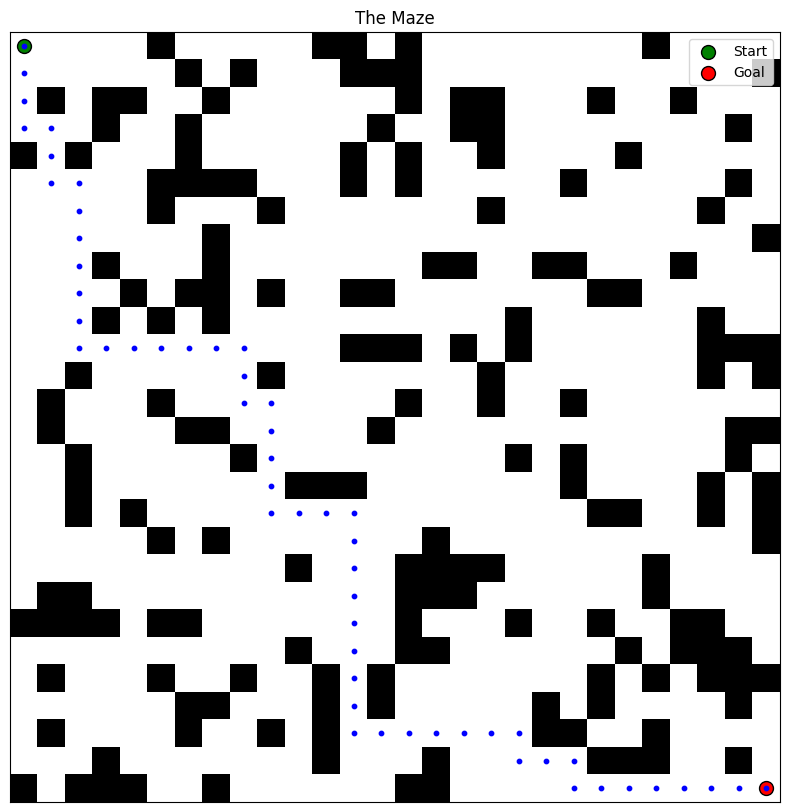

In [ ]:
def a_star_search_manhattan(maze, start, goal):

    rows, cols = maze.shape
    priority_queue = [(0, 0, start, [start])]
    visited = set()

    while priority_queue:
        f_cost, g_cost, current, path = heapq.heappop(priority_queue)

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)
        x, y = current

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            neighbor = (nx, ny)

            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and neighbor not in visited:
                g = g_cost + 1
                h = abs(nx - goal[0]) + abs(ny - goal[1])
                f = g + h
                heapq.heappush(priority_queue, (f, g, neighbor, path + [neighbor]))

    return None


astar_path_manhattan = a_star_search_manhattan(maze, start_point, goal_point)
if astar_path_manhattan:
    print(f"A* (Manhattan) Path found of Length: {len(astar_path_manhattan)}")
    plot_maze(maze, start_point, goal_point, astar_path_manhattan)
else:
    print("A* (Manhattan) could not find a path!")

A* (Euclidean) Path found of Length: 55


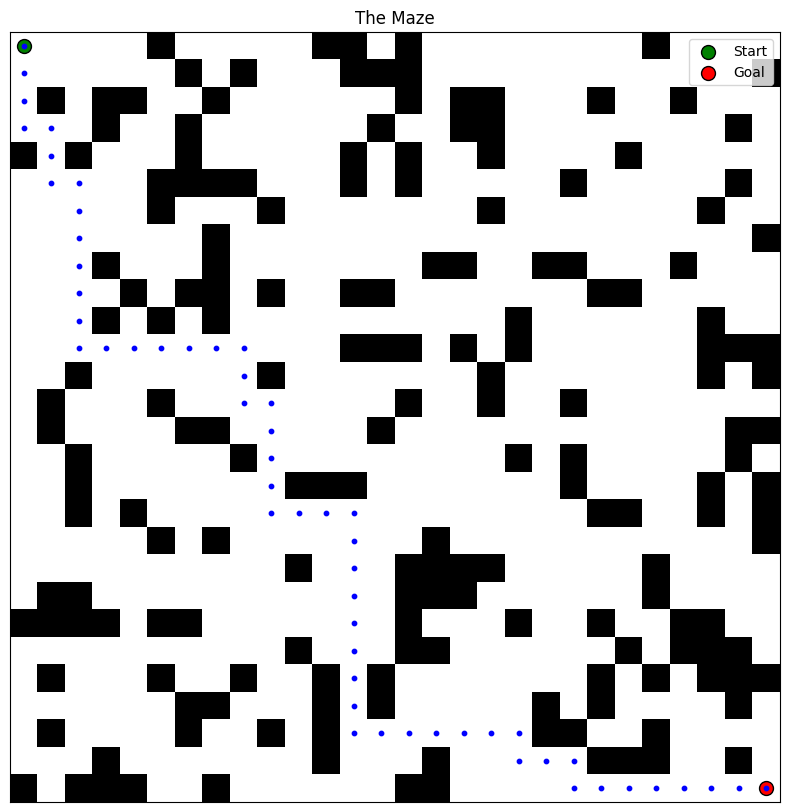

In [ ]:
def a_star_search_euclidean(maze, start, goal):

    rows, cols = maze.shape
    priority_queue = [(0, 0, start, [start])]
    visited = set()

    while priority_queue:
        f_cost, g_cost, current, path = heapq.heappop(priority_queue)

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)
        x, y = current

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            neighbor = (nx, ny)

            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0 and neighbor not in visited:
                g = g_cost + 1
                h = ((nx - goal[0])**2 + (ny - goal[1])**2)**0.5
                f = g + h
                heapq.heappush(priority_queue, (f, g, neighbor, path + [neighbor]))

    return None


astar_path_euclidean = a_star_search_euclidean(maze, start_point, goal_point)
if astar_path_euclidean:
    print(f"A* (Euclidean) Path found of Length: {len(astar_path_euclidean)}")
    plot_maze(maze, start_point, goal_point, astar_path_euclidean)
else:
    print("A* (Euclidean) could not find a path!")

##Hill Climibing

In [ ]:
def hill_climbing(maze, start, goal):

    rows, cols = maze.shape
    current = start
    path = [start]

    while current != goal:
        x, y = current
        neighbors = []

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0:
                neighbors.append((nx, ny))

        if neighbors:
            current = min(neighbors, key=lambda n: abs(n[0] - goal[0]) + abs(n[1] - goal[1])) # Equation of Manhattan distance provided in the report
            if current in path:  # this is used to avoid cycles
                break
            path.append(current)
        else:
            break  # No valid moves that indicates stucking in a local optimum.

    return path if current == goal else None

hc_path = hill_climbing(maze, start_point, goal_point)

if hc_path:
    print(f"Hill Climbing Path found ofLength: {len(hc_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=hc_path)
else:
    print("Hill Climbing could not find a path!")

Hill Climbing could not find a path!


##Simulating Annealing

Simulated Annealing Path found of Length 477


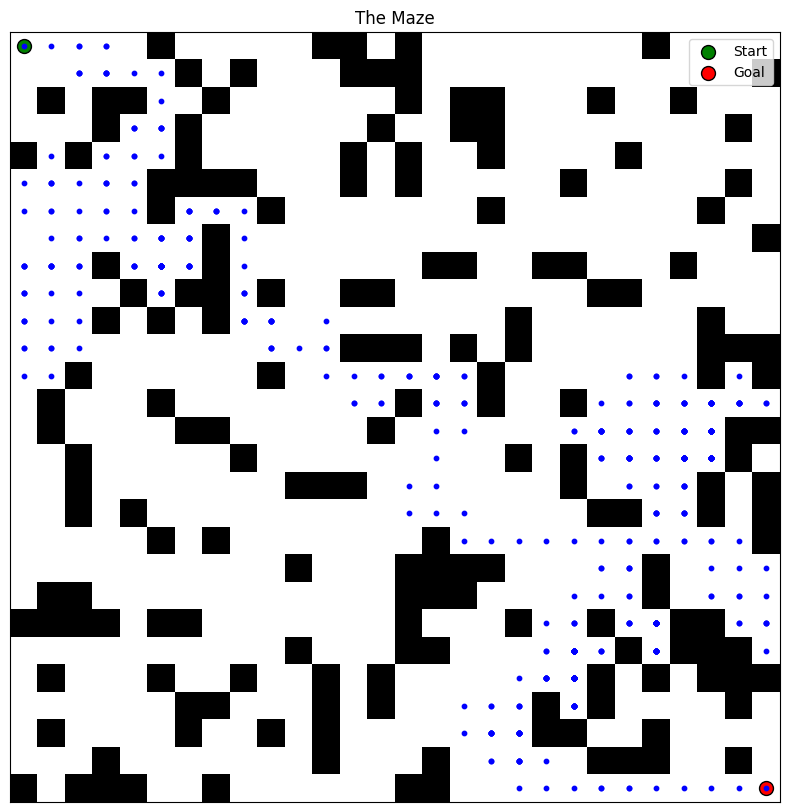

In [ ]:
import random
from math import exp
from itertools import count

def get_actions(maze, state):
    x, y = state
    actions = []
    if x > 0 and maze[x - 1, y] == 0:
        actions.append((-1, 0))
    if x < maze.shape[0] - 1 and maze[x + 1, y] == 0:
        actions.append((1, 0))
    if y > 0 and maze[x, y - 1] == 0:
        actions.append((0, -1))
    if y < maze.shape[1] - 1 and maze[x, y + 1] == 0:
        actions.append((0, 1))
    return actions

def apply_action(state, action):
    return (state[0] + action[0], state[1] + action[1])

def heuristic(state, goal):
    return abs(state[0] - goal[0]) + abs(state[1] - goal[1])
def simulated_annealing(maze, start, goal, schedule, max_steps=5000):
    current_state = start
    current_value = heuristic(current_state, goal)
    path = [current_state]

    for t in range(max_steps):
        T = schedule(t)
        if current_value == 0 or T == 0:
            return current_state, path

        next_states = [apply_action(current_state, action) for action in get_actions(maze, current_state)]

        if not next_states:
            break

        next_state = random.choice(next_states)
        next_value = heuristic(next_state, goal)

        delta = current_value - next_value

        if delta > 0 or random.random() < exp(delta / T):
            current_state, current_value = next_state, next_value
            path.append(current_state)

    return None, path

def schedule(t):
    T0 = 10.0
    alpha = 0.01
    return T0 / (1 + alpha * t)

solution, path = simulated_annealing(maze, start_point, goal_point, schedule)

if solution:
    print("Simulated Annealing Path found of Length", len(path))
else:
    print("Failed to reach the goal.")
plot_maze(maze, start=start_point, goal=goal_point, path=path)

##Genetic Algorithm

In [ ]:
def generate_random_path(maze, start, goal, max_steps=100):

    rows, cols = maze.shape
    path = [start]
    current = start

    for _ in range(max_steps):
        if current == goal:
            break

        x, y = current
        neighbors = []

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]: # Up, Down, Left, Right
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0:
                neighbors.append((nx, ny))

        if neighbors:
            current = random.choice(neighbors)
            path.append(current)
        else:
            break
    return path

In [ ]:
def fitness_function(path, goal):

    if not path:
        return float('inf')
    last_node = path[-1]
    distance_to_goal = abs(last_node[0] - goal[0]) + abs(last_node[1] - goal[1])
    return len(path) + distance_to_goal

In [ ]:
def crossover(parent1, parent2):
    crossover_point = min(len(parent1), len(parent2)) // 2
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

In [ ]:
def mutate(path, maze, mutation_rate=0.1):
    rows, cols = maze.shape
    for i in range(len(path)):
        if random.random() < mutation_rate:
            x, y = path[i]
            neighbors = []

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 0:
                    neighbors.append((nx, ny))
            if neighbors:
                path[i] = random.choice(neighbors)

    return path

Genetic Algorithm Path found of Length: 1079


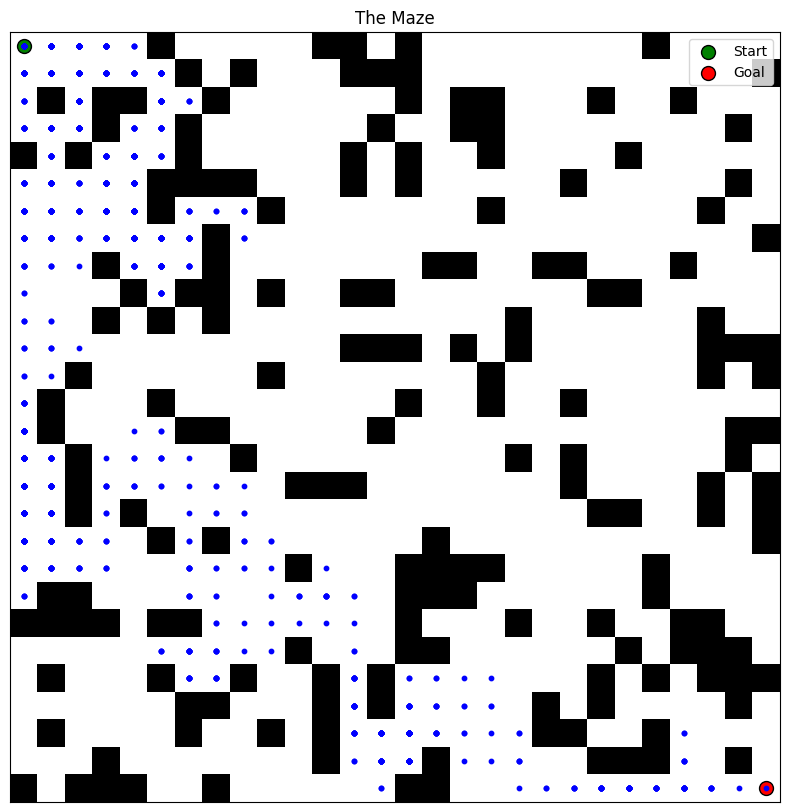

In [ ]:
def genetic_algorithm(maze, start, goal, population_size=100, generations=1300, max_steps=1320):

    population = [generate_random_path(maze, start, goal, max_steps) for _ in range(population_size)]

    for generation in range(generations):
        population = sorted(population, key=lambda path: fitness_function(path, goal))

        best_path = population[0]
        if best_path[-1] == goal:
            return best_path

        parents = population[:population_size // 2]

        new_population = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2)
            child = mutate(child, maze)
            new_population.append(child)

        population = new_population
    return None


ga_path = genetic_algorithm(maze, start_point, goal_point)

if ga_path:
    print(f"Genetic Algorithm Path found of Length: {len(ga_path)}")
    plot_maze(maze, start=start_point, goal=goal_point, path=ga_path)
else:
    print("Genetic Algorithm could not find a path!")

## Performance Measure

In [ ]:
def cooling_schedule(t):
    return max(0.01, 0.99 * t)

def measure_algorithm_complexity(algorithm, maze, start, goal, schedule=None):

    start_time = time.time()
    if schedule is not None:
        result = algorithm(maze, start, goal, schedule)
    else:
        result = algorithm(maze, start, goal)

    end_time = time.time()
    execution_time = end_time - start_time
    space_complexity = sys.getsizeof(result) if result is not None else 0

    return execution_time, space_complexity



algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "UCS": ucs,
    "ids": ids,
    "Greedy Best-First Search (Manhattan)": greedy_best_first_search_manhattan,
    "Greedy Best-First Search (Euclidean)": greedy_best_first_search_euclidean,
    "A* Search (Manhattan)": a_star_search_manhattan,
    "A* Search (Euclidean)": a_star_search_euclidean,
    "Hill Climbing": hill_climbing,
    "Simulated Annealing": simulated_annealing,
    "Genetic Algorithm": genetic_algorithm
}


results = {}
for name, algo in algorithms.items():
    try:
        if name == "Simulated Annealing":
            time_complexity, space_complexity = measure_algorithm_complexity(
                algo, maze, start_point, goal_point, schedule=cooling_schedule
            )
        else:
            time_complexity, space_complexity = measure_algorithm_complexity(
                algo, maze, start_point, goal_point
            )
        results[name] = (time_complexity, space_complexity)
    except Exception as e:
        results[name] = (f"Error: {e}", "N/A")

print(f"{'Algorithm':<40} {'Time Complexity (s)':<25} {'Space Complexity (bytes)':<25}")
for name, (time_c, space_c) in results.items():
    print(f"{name:<40} {time_c:<25} {space_c:<25}")

Algorithm                                Time Complexity (s)       Space Complexity (bytes) 
BFS                                      0.003110647201538086      496                      
DFS                                      0.0031664371490478516     1136                     
UCS                                      0.004219532012939453      496                      
ids                                      0.17559528350830078       832                      
Greedy Best-First Search (Manhattan)     0.0009298324584960938     688                      
Greedy Best-First Search (Euclidean)     0.0008385181427001953     560                      
A* Search (Manhattan)                    0.0025207996368408203     496                      
A* Search (Euclidean)                    0.004380464553833008      496                      
Hill Climbing                            0.00011992454528808594    0                        
Simulated Annealing                      0.03936171531677246       56 

## Phase 2

In [ ]:
alpha = 0.1       # alpha is the learning rate
gamma = 0.9       # gamma is the discount factor
epsilon = 0.2     # epilson is the initial exploration rate
episodes = 5000   # This is the number of training episodes
max_steps = 1000  # This is the max steps per episode

actions = {
    0: (-1, 0),  # Move Up
    1: (1, 0),   # Move Down
    2: (0, -1),  # Move Left
    3: (0, 1)    # Move Right
}

In [ ]:
def reward_fun(state, goal, maze):
    if state == goal:
        return 100
    elif maze[state] == 1:  # State = 1 in which represnts the Wall of the maze
        return -10
    else:
        return -1

In [ ]:
def valid_move(maze, state):
    x, y = state
    return 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] == 0

In [ ]:
def epsilon_fun(episode, min_epsilon=0.01, decay_rate=0.001):
    return max(min_epsilon, epsilon * np.exp(-decay_rate * episode))

In [ ]:
def QLearning(maze, start, goal):
    global Qtable
    Qtable = np.zeros((*maze.shape, len(actions)))

    for episode in range(episodes):
        state = start
        total_reward = 0
        current_epsilon = epsilon_fun(episode)

        for step in range(max_steps):

            if np.random.rand() < current_epsilon:
                action = np.random.choice(list(actions.keys()))
            else:
                action = np.argmax(Qtable[state])

            move = actions[action]
            next_state = (state[0] + move[0], state[1] + move[1])


            if not valid_move(maze, next_state):
                reward = reward_fun(state, goal, maze)
                next_state = state
            else:
                reward = reward_fun(next_state, goal, maze)

            best_next_action = np.max(Qtable[next_state])
            Qtable[state][action] = Qtable[state][action] + alpha * (
                reward + gamma * best_next_action - Qtable[state][action]
            )

            state = next_state
            total_reward += reward

            if state == goal:
                break

        if (episode + 1) % 1000 == 0:
            print(f"Episode number {episode + 1},with a total Reward: {total_reward}")

In [ ]:
def visualize_QLearning_policy(maze, start, goal):
    state = start
    path = [state]
    while state != goal:
        action = np.argmax(Qtable[state])
        move = actions[action]
        next_state = (state[0] + move[0], state[1] + move[1])

        if not valid_move(maze, next_state):
            break
        path.append(next_state)
        state = next_state

    plot_maze(maze, start=start, goal=goal, path=path)

Episode number 1000,with a total Reward: 13
Episode number 2000,with a total Reward: 47
Episode number 3000,with a total Reward: 37
Episode number 4000,with a total Reward: 47
Episode number 5000,with a total Reward: 47


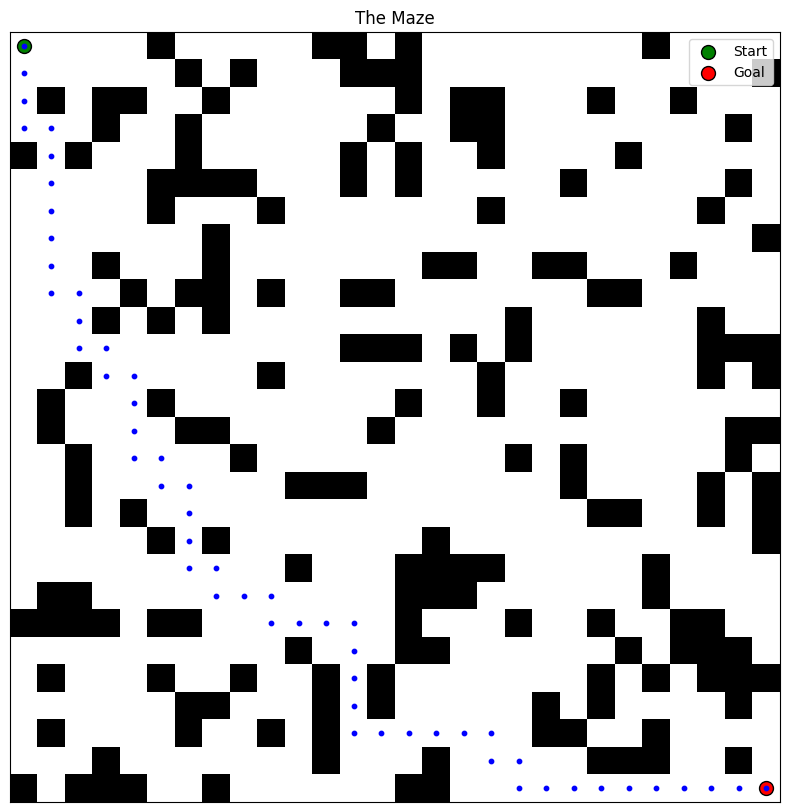

In [ ]:
QLearning(maze, start_point, goal_point)
visualize_QLearning_policy(maze, start_point, goal_point)